In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols    
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import dataframe_image as dfi

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [2]:
elect=pd.read_excel('Election_Data.xlsx')

In [3]:
elect.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
dfi.export(elect.head(),'head elect.png')

In [5]:
elect.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [7]:
elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
(elect == 0).all()

Unnamed: 0                 False
vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

In [9]:
elect.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

## 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [10]:
for column in elect.columns:
    if elect[column].dtype == 'object':
        print(column.upper(),': ',elect[column].nunique())
        print(elect[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [11]:
elect.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [12]:
row, col = elect.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 1525 rows and 10 columns in the dataset


In [13]:
elect.drop(['Unnamed: 0'], axis = 1,inplace=True)


In [14]:
elect.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [15]:
dups = elect.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
elect[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [16]:
dfi.export(elect[dups],'dup elect.jpg')

In [17]:
print('Before',elect.shape)
elect.drop_duplicates(inplace=True) 
print('After',elect.shape)

Before (1525, 9)
After (1517, 9)


In [18]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(elect[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(elect[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=elect[column])
    plt.show()

In [19]:
elect0 = elect.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(elect0.columns.values)
len(lstnumericcolumns)

7

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

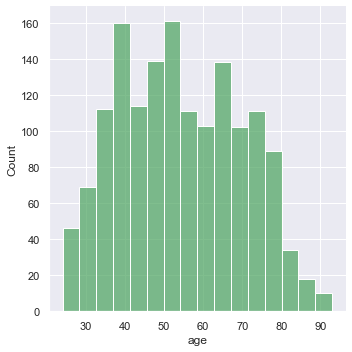

BoxPlot of age
----------------------------------------------------------------------------


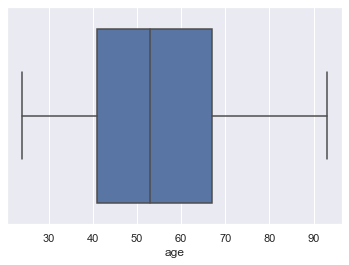

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Distribution of economic.cond.national
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

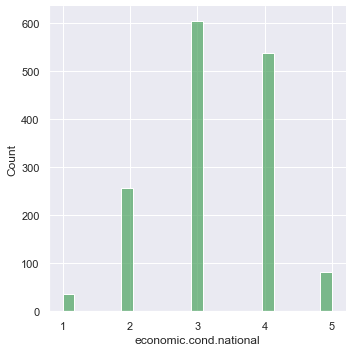

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


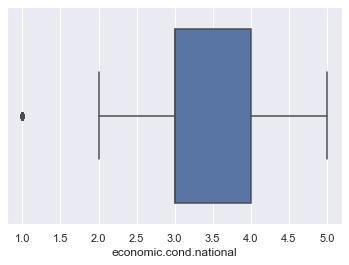

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Distribution of economic.cond.household
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

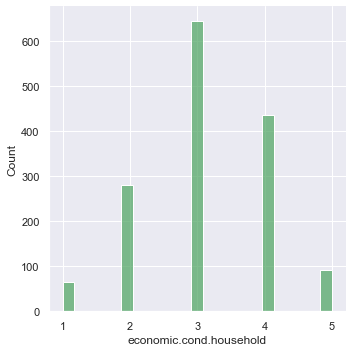

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


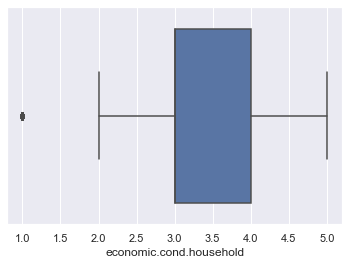

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

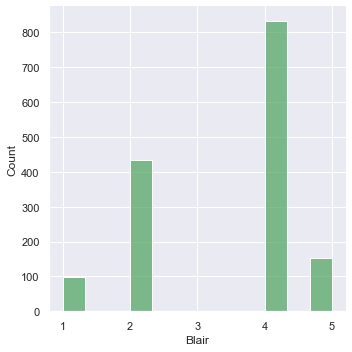

BoxPlot of Blair
----------------------------------------------------------------------------


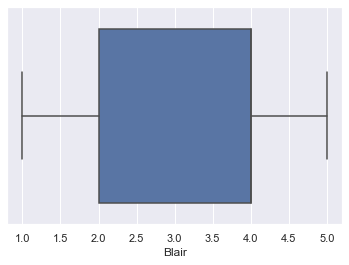

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

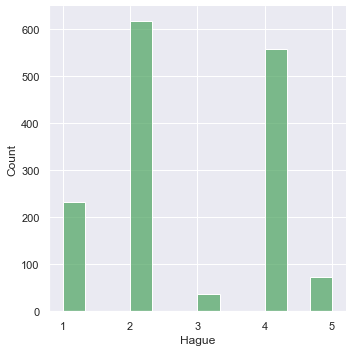

BoxPlot of Hague
----------------------------------------------------------------------------


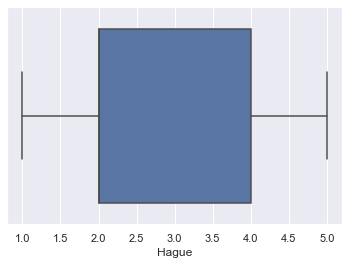

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

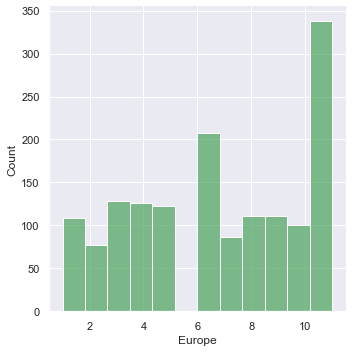

BoxPlot of Europe
----------------------------------------------------------------------------


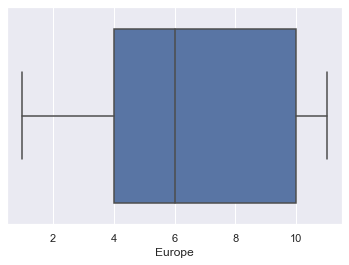

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Distribution of political.knowledge
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

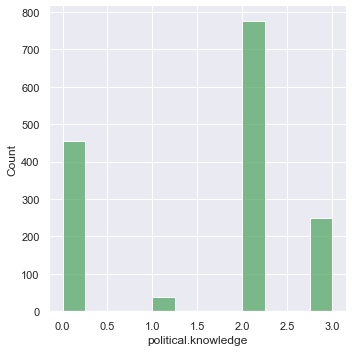

BoxPlot of political.knowledge
----------------------------------------------------------------------------


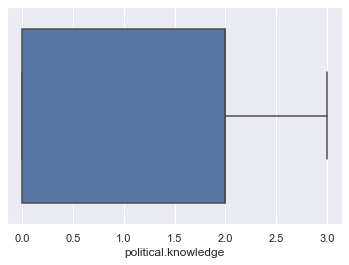

In [20]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:xlabel='gender', ylabel='count'>

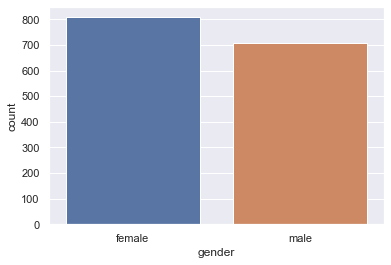

In [21]:
sns.countplot(x=elect['gender'],data=elect)

<AxesSubplot:xlabel='vote', ylabel='count'>

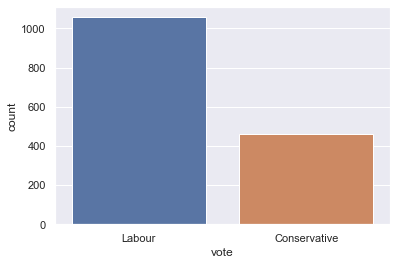

In [22]:
sns.countplot(x=elect['vote'],data=elect)

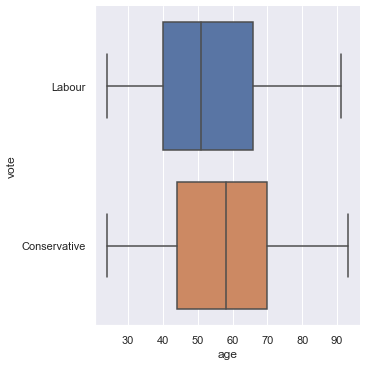

In [23]:
sns.catplot(x='age', data=elect, kind='box',y='vote')

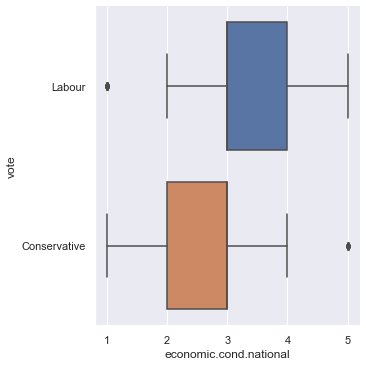

In [24]:
sns.catplot(x='economic.cond.national', data=elect, kind='box',y='vote')

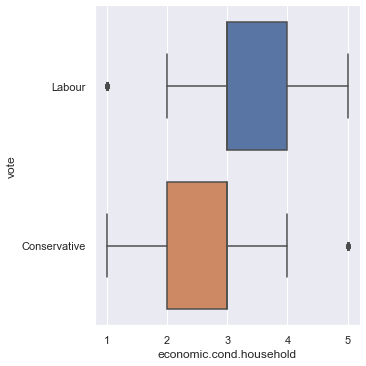

In [25]:
sns.catplot(x='economic.cond.household', data=elect, kind='box',y='vote')

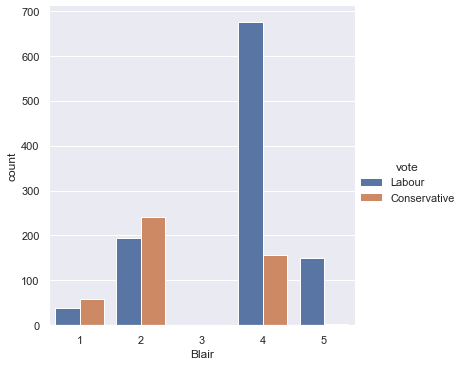

In [26]:
sns.catplot(x='Blair', data=elect, kind='count',hue='vote')

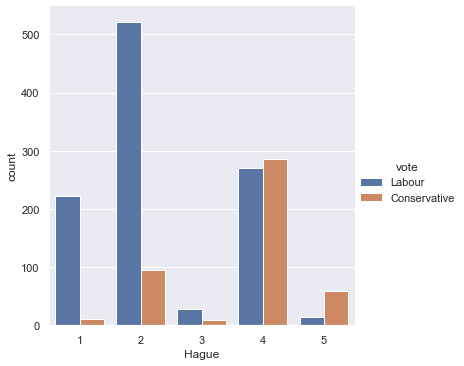

In [27]:
sns.catplot(x='Hague', data=elect, kind='count',hue='vote')

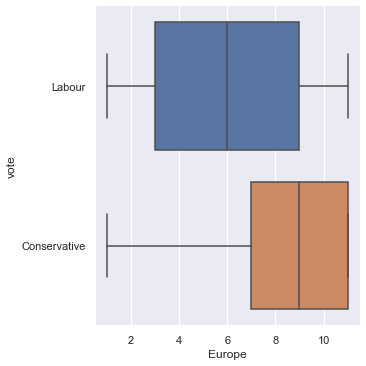

In [28]:
sns.catplot(x='Europe', data=elect, kind='box',y='vote')

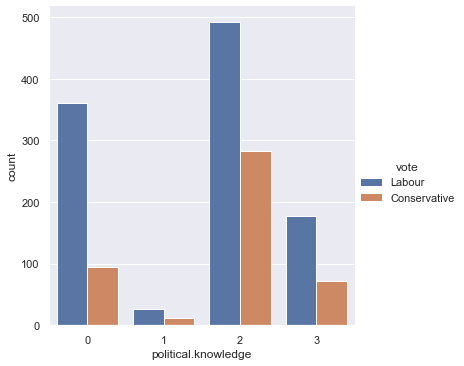

In [29]:
sns.catplot(x='political.knowledge', data=elect, kind='count',hue='vote')

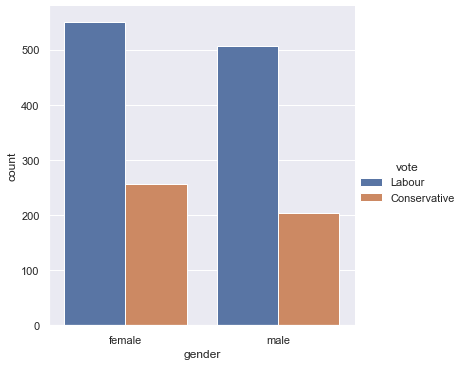

In [30]:
sns.catplot(x='gender', data=elect, kind='count',hue='vote')

In [31]:
elect.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

<AxesSubplot:>

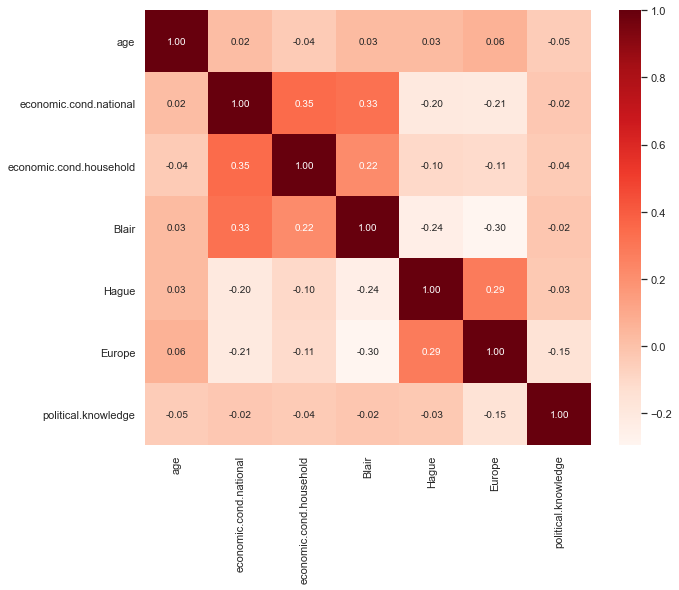

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(elect.corr(),annot=True,fmt='.2f',cmap='Reds')

In [33]:
elect.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


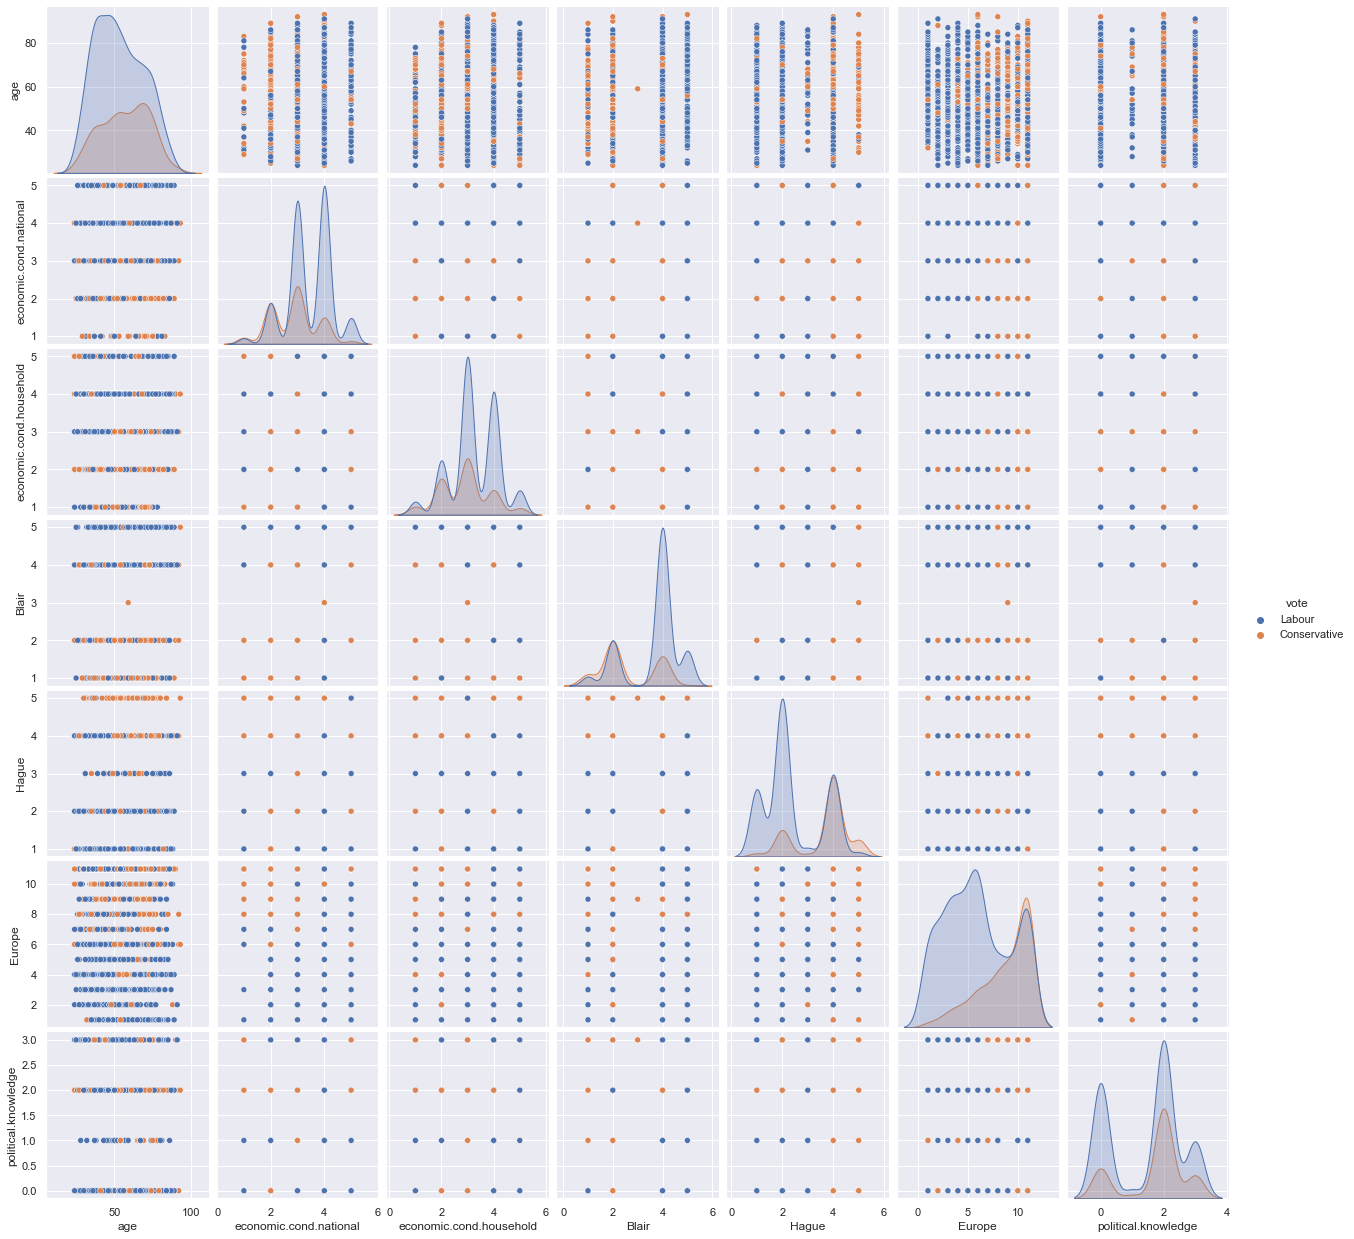

In [34]:
sns.pairplot(elect,hue='vote')

<AxesSubplot:>

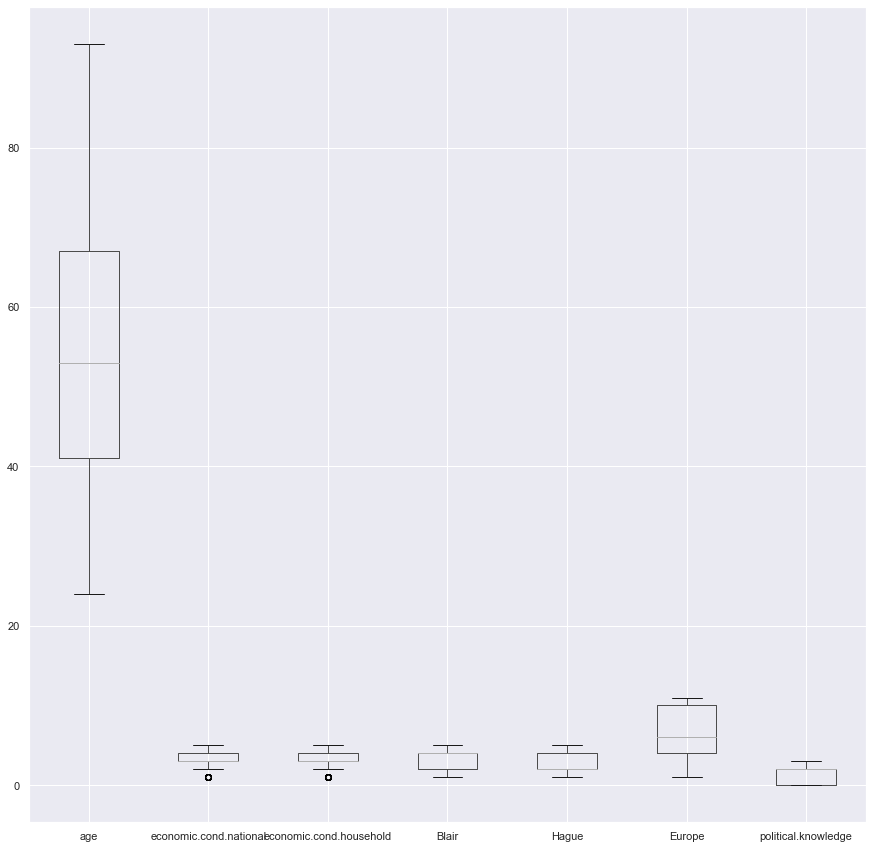

In [35]:
plt.figure(figsize=(15,15))
elect.boxplot()

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [36]:
elect1 = pd.get_dummies(elect,drop_first=True)
elect1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [37]:
elect1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


In [38]:
# Copy all the predictor variables into X dataframe
X = elect1.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = elect1['vote_Labour']

In [39]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [40]:
y_train.value_counts()

1    754
0    307
Name: vote_Labour, dtype: int64

In [41]:
y_test.value_counts()

1    303
0    153
Name: vote_Labour, dtype: int64

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

LOGISTIC REGRESSION

In [42]:
#logistic regression 

lgmodel = LogisticRegression(solver='liblinear')
lgmodel=lgmodel.fit(X_train, y_train)
lgmodel

LogisticRegression(solver='liblinear')

In [43]:
lgrpred_train=lgmodel.predict(X_train)
lgrpred_test =lgmodel.predict(X_test)

In [44]:
lg_pred_prob_train = lgmodel.predict_proba(X_train)

lg_pred_prob_test = lgmodel.predict_proba(X_test)

In [45]:
lgmodel_train_score = lgmodel.score(X_train, y_train)
print ('Accuracy score  for Logistic regression  train variable',lgmodel_train_score)

Accuracy score  for Logistic regression  train variable 0.8369462770970783


In [46]:
lgmodel_test_score = lgmodel.score(X_test, y_test)
print ('Accuracy score  for Logistic regression  test variable',lgmodel_test_score)

Accuracy score  for Logistic regression  test variable 0.8289473684210527


LDA (linear discriminant analysis)

In [47]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

LinearDiscriminantAnalysis()

In [48]:
ldapred_train=ldamodel.predict(X_train)
ldapred_test =ldamodel.predict(X_test)

In [49]:
ld_pred_prob_train = ldamodel.predict_proba(X_train)

ld_pred_prob_test = ldamodel.predict_proba(X_test)

In [50]:
ldamodel_train_score = ldamodel.score(X_train, y_train)
print ('Accuracy score  for LDA  train variable',ldamodel_train_score)

Accuracy score  for LDA  train variable 0.8341187558906692


In [51]:
ldamodel_test_score = ldamodel.score(X_test, y_test)
print ('Accuracy score  for LDA  test variable',ldamodel_test_score)

Accuracy score  for LDA  test variable 0.8333333333333334


## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

### KNN Model

In [52]:
from scipy.stats import zscore
X1=X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']].apply(zscore)
X1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [53]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3 , random_state=1)

In [54]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X1_train,y_train)

KNeighborsClassifier()

In [55]:
## Accuracy score on KNN train data set
knny_train_predict = KNN_model.predict(X1_train)
knnmodel_score = KNN_model.score(X1_train, y_train)
print ('Accuracy score  for KNN train variable',knnmodel_score)


Accuracy score  for KNN train variable 0.8557964184731386


In [56]:
# Accuracy score on KNN test data set
knny_test_predict = KNN_model.predict(X1_test)
knntmodel_score = KNN_model.score(X1_test, y_test)
print ('Accuracy score  for KNN test variable',knntmodel_score)

Accuracy score  for KNN test variable 0.8245614035087719


### Naïve Bayes Model

In [57]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [58]:
## Accuracy score on NB train data set
nby_train_predict = NB_model.predict(X_train)
nbmodel_score = NB_model.score(X_train, y_train)                      
print ('Accuracy score  for NB train variable',nbmodel_score)

Accuracy score  for NB train variable 0.8350612629594723


In [59]:
## Accuracy score on NB test data set
nby_test_predict = NB_model.predict(X_test)
nbtmodel_score = NB_model.score(X_test, y_test)                   
print ('Accuracy score  for NB test variable',nbtmodel_score)

Accuracy score  for NB test variable 0.8223684210526315


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [60]:
rfc = RandomForestClassifier()

In [61]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [62]:
print(clf.best_params_)


{'max_depth': 10, 'max_features': 2}


In [63]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [64]:
# bagging with random forest classfier
bag = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=1)


bag = bag.fit(X_train, y_train)

bag

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

In [65]:
train_pred_bag=bag.predict(X_train)
test_pred_bag =bag.predict(X_test)

In [66]:
bag.score(X_train, y_train)


0.9651272384542884

In [67]:
bag.score(X_test, y_test)


0.831140350877193

In [68]:
# Boosting = Ada Boosting 
adb = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
adb = adb.fit(X_train, y_train)
adb

AdaBoostClassifier(n_estimators=10, random_state=1)

In [69]:
train_pred_adb=adb.predict(X_train)
test_pred_adb =adb.predict(X_test)

In [70]:
adb.score(X_train, y_train)

0.8426013195098964

In [71]:
adb.score(X_test, y_test)

0.8201754385964912

In [72]:
# Boosting = Gradient Boosting 
gdb = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gdb = gdb.fit(X_train, y_train)
gdb

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [73]:
train_pred_gdb=gdb.predict(X_train)
test_pred_gdb =gdb.predict(X_test)

In [74]:
gdb.score(X_train, y_train)

0.8803016022620169

In [75]:
gdb.score(X_test, y_test)

0.8289473684210527

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (4 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized

## Logistic regression

In [76]:

lgmodel_train_score = lgmodel.score(X_train, y_train)
print ("Accuracy score  for Logistic regression  train variables  ",lgmodel_train_score)

Accuracy score  for Logistic regression  train variables   0.8369462770970783


In [77]:
lgmodel_test_score= lgmodel.score(X_test, y_test)
print ("Accuracy score  for Logistic regression  train variables  ",lgmodel_test_score)

Accuracy score  for Logistic regression  train variables   0.8289473684210527


AUC for the Training Data: 0.890
AUC for the Testing Data: 0.890


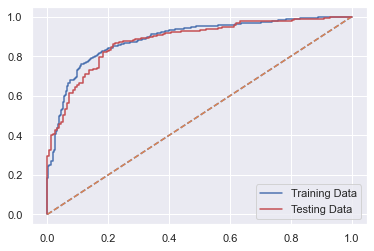

In [78]:
# AUC and ROC for the training data

# calculate AUC
lg_train_auc = metrics.roc_auc_score(y_train,lg_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lg_train_auc)

# calculate roc curve
lgtrain_fpr, lgtrain_tpr, lgtrain_thresholds = roc_curve(y_train, lg_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgtrain_fpr, lgtrain_tpr,label = 'Training Data',color="b")

# AUC and ROC for the test data

# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,lg_pred_prob_test[:,1])
print('AUC for the Testing Data: %.3f' % lg_train_auc)

# calculate roc curve
lgtest_fpr, lgtest_tpr, lgtest_thresholds = roc_curve(y_test, lg_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lgtest_fpr, lgtest_tpr,label = 'Testing Data',color="r")

# show the plot
plt.legend(loc='best')
plt.show()

 confusion matrix Train and Test variables for logistic regression 


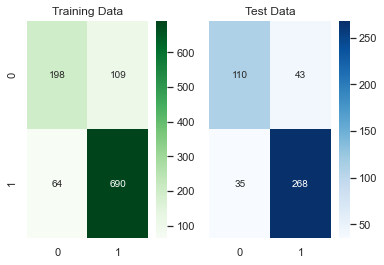

In [79]:
print(" confusion matrix Train and Test variables for logistic regression ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, lgrpred_train),annot=True,fmt='.5g',cmap='Greens',ax=a[0][0]);
a[0][0].set_title('Training Data')

#Plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, lgrpred_test),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [80]:
confusion_matrix(y_train, lgrpred_train)

array([[198, 109],
       [ 64, 690]], dtype=int64)

In [81]:
confusion_matrix(y_test, lgrpred_test)

array([[110,  43],
       [ 35, 268]], dtype=int64)

In [82]:
print('Classification report of Logistic Regression Training Data','\n\n\n',classification_report(y_train,lgrpred_train))
print('\n\nClassification report of Logistic Regression Testing Data','\n\n',classification_report(y_test,lgrpred_test))

Classification report of Logistic Regression Training Data 


               precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



Classification report of Logistic Regression Testing Data 

               precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



## LDA

In [83]:
ldamodel_train_score = ldamodel.score(X_train, y_train)
print ("Accuracy score  for LDA  train variables ",ldamodel_train_score)

Accuracy score  for LDA  train variables  0.8341187558906692


In [84]:
ldamodel_test_score = ldamodel.score(X_test, y_test)
print ("Accuracy score  for LDA  test variables ",ldamodel_test_score)

Accuracy score  for LDA  test variables  0.8333333333333334


 confusion matrix Train and Test variables for LDA 


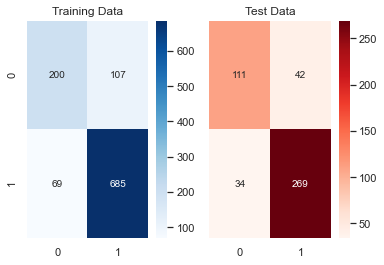

In [85]:
print(" confusion matrix Train and Test variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, ldapred_train),annot=True,fmt='.5g',cmap='Blues',ax=a[0][0]);
a[0][0].set_title('Training Data')

#Plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, ldapred_test),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [86]:
confusion_matrix(y_train, ldapred_train)

array([[200, 107],
       [ 69, 685]], dtype=int64)

In [87]:
confusion_matrix(y_test, ldapred_test)

array([[111,  42],
       [ 34, 269]], dtype=int64)

In [88]:
print('Classification report of LDA Training Data','\n\n',classification_report(y_train,ldapred_train))
print('\n\nClassification report of LDA Testing Data','\n\n',classification_report(y_test,ldapred_test))

Classification report of LDA Training Data 

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Classification report of LDA Testing Data 

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


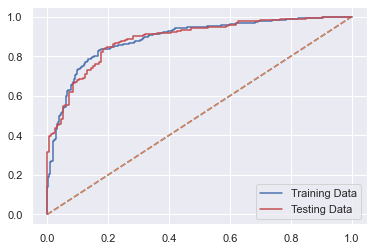

In [89]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,ld_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

# calculate roc curve
ldatrain_fpr, ldatrain_tpr, lpatrain_thresholds = roc_curve(y_train, ld_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldatrain_fpr, ldatrain_tpr,label = 'Training Data',color="b")

# AUC and ROC for the testing data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,ld_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

# calculate roc curve
ldatest_fpr, ldatest_tpr, ldatest_thresholds = roc_curve(y_test, ld_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldatest_fpr, ldatest_tpr,label = 'Testing Data',color="r")

# show the plot
plt.legend(loc='best')
plt.show()

### KNN Model

In [90]:
print ('Accuracy score  for KNN train variable',knnmodel_score)
print ('Accuracy score  for KNN test variable',knntmodel_score)

Accuracy score  for KNN train variable 0.8557964184731386
Accuracy score  for KNN test variable 0.8245614035087719


 confusion matrix Train variables for KNN 


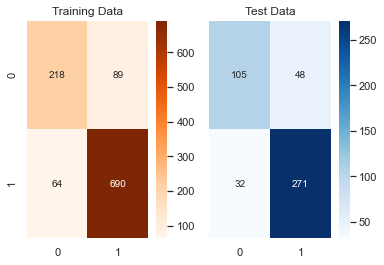

In [91]:
print(" confusion matrix Train variables for KNN ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, knny_train_predict)),annot=True,fmt='.5g',cmap='Oranges',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, knny_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [92]:
confusion_matrix(y_train,knny_train_predict)

array([[218,  89],
       [ 64, 690]], dtype=int64)

In [93]:
confusion_matrix(y_test,knny_test_predict)

array([[105,  48],
       [ 32, 271]], dtype=int64)

In [94]:
print("\nKNN Classfication report\n ")

print('Classification Report of the training data:\n',metrics.classification_report(y_train,knny_train_predict),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(y_test, knny_test_predict),'\n')


KNN Classfication report
 
Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.927
AUC for the Test Data: 0.870


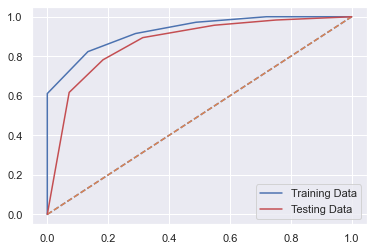

In [95]:

knn_pred_prob_train = KNN_model.predict_proba(X1_train)

# calculate AUC
knn_train_auc = metrics.roc_auc_score(y_train,knn_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % knn_train_auc)

# calculate roc curve
knntrain_fpr, knntrain_tpr, knntrain_thresholds = roc_curve(y_train, knn_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knntrain_fpr, knntrain_tpr,label = 'Training Data',color="b")

knn_pred_prob_test = KNN_model.predict_proba(X1_test)
# calculate AUC
knn_test_auc = metrics.roc_auc_score(y_test,knn_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % knn_test_auc)

# calculate roc curve
knntest_fpr, knntest_tpr, knntest_thresholds = roc_curve(y_test, knn_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knntest_fpr, knntest_tpr,label = 'Testing Data',color="r")

# show the plot
plt.legend(loc='best')
plt.show()


## Naive Bayes

In [96]:
print ('Accuracy score  for NB train variable',nbmodel_score)
print ('Accuracy score  for NB test variable',nbtmodel_score)

Accuracy score  for NB train variable 0.8350612629594723
Accuracy score  for NB test variable 0.8223684210526315


 confusion matrix Train variables for KNN 


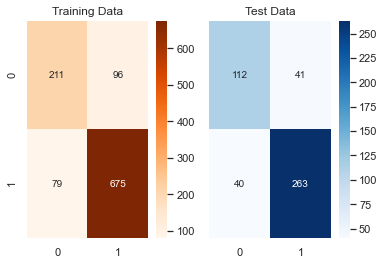

In [97]:
print(" confusion matrix Train variables for KNN ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, nby_train_predict)),annot=True,fmt='.5g',cmap='Oranges',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, nby_test_predict)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [98]:
confusion_matrix(y_train,nby_train_predict)

array([[211,  96],
       [ 79, 675]], dtype=int64)

In [99]:
confusion_matrix(y_test,nby_test_predict)

array([[112,  41],
       [ 40, 263]], dtype=int64)

In [100]:
print("\nNaive Bayse Classfication report\n ")

print('Classification Report of the training data:\n',metrics.classification_report(y_train,nby_train_predict),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(y_test, nby_test_predict),'\n')


Naive Bayse Classfication report
 
Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.888
AUC for the Test Data: 0.876


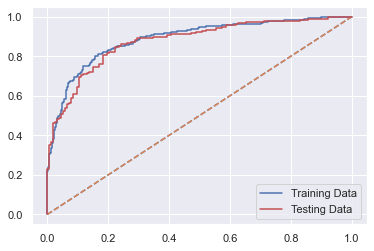

In [101]:

nb_pred_prob_train = NB_model.predict_proba(X_train)
# calculate AUC
nb_train_auc = metrics.roc_auc_score(y_train,nb_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % nb_train_auc)

# calculate roc curve
nbtrain_fpr, nbtrain_tpr, nbtrain_thresholds = roc_curve(y_train, nb_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbtrain_fpr, nbtrain_tpr,label = 'Training Data',color="b")

nb_pred_prob_test = NB_model.predict_proba(X_test)
# calculate AUC
nb_test_auc = metrics.roc_auc_score(y_test,nb_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % nb_test_auc)

# calculate roc curve
nbtest_fpr, nbtest_tpr, nbtest_thresholds = roc_curve(y_test, nb_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nbtest_fpr, nbtest_tpr,label = 'Testing Data',color="r")

# show the plot
plt.legend(loc='best')
plt.show()

## Bagging random forest

In [102]:
print("Accuracy score  for Bagging train variables ",bag.score(X_train, y_train))
print("Accuracy score  for Bagging test variables ",bag.score(X_test, y_test))


Accuracy score  for Bagging train variables  0.9651272384542884
Accuracy score  for Bagging test variables  0.831140350877193


 confusion matrix Train variables for Bagging Random Forest 


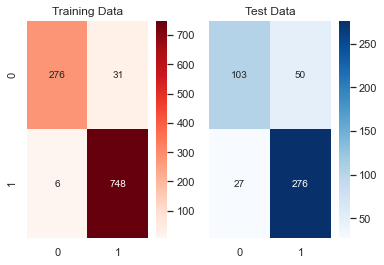

In [103]:
print(" confusion matrix Train variables for Bagging Random Forest ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_bag)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_bag)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [104]:
confusion_matrix(y_train,train_pred_bag)

array([[276,  31],
       [  6, 748]], dtype=int64)

In [105]:
confusion_matrix(y_test,test_pred_bag)

array([[103,  50],
       [ 27, 276]], dtype=int64)

In [106]:
print("\nBagging (Random Forest) Classfication report\n ")

print('Classification Report of the training data:\n',metrics.classification_report(y_train,train_pred_bag),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(y_test, test_pred_bag),'\n')


Bagging (Random Forest) Classfication report
 
Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.96      1061
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.997
AUC for the Test Data: 0.896


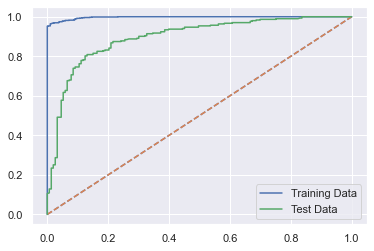

In [107]:

bag_pred_prob_train = bag.predict_proba(X_train)
# calculate AUC
bag_train_auc = metrics.roc_auc_score(y_train,bag_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % bag_train_auc)

# calculate roc curve
bagtrain_fpr, bagtrain_tpr, bagtrain_thresholds = roc_curve(y_train, bag_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagtrain_fpr, bagtrain_tpr,label = 'Training Data',color="b")

bag_pred_prob_test = bag.predict_proba(X_test)
# calculate AUC
bag_test_auc = metrics.roc_auc_score(y_test,bag_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % bag_test_auc)

# calculate roc curve
bagtest_fpr, bagtest_tpr, bagtest_thresholds = roc_curve(y_test, bag_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagtest_fpr, bagtest_tpr,label = 'Test Data')

# show the plot
plt.legend(loc='best')
plt.show()

## Boosting = Ada Boosting 

In [108]:
print("Accuracy score  for ADA Boosting train variables ",adb.score(X_train, y_train))
print("Accuracy score  for ADA Boosting test variables ",adb.score(X_test, y_test))

Accuracy score  for ADA Boosting train variables  0.8426013195098964
Accuracy score  for ADA Boosting test variables  0.8201754385964912


 confusion matrix Train variables for ADA Boosting 


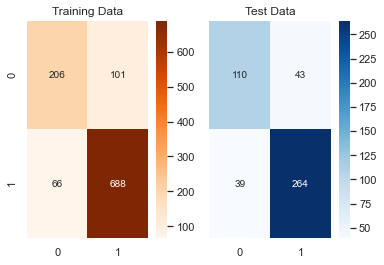

In [109]:
print(" confusion matrix Train variables for ADA Boosting ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_adb)),annot=True,fmt='.5g',cmap='Oranges',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_adb)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [110]:
confusion_matrix(y_train,train_pred_adb)

array([[206, 101],
       [ 66, 688]], dtype=int64)

In [111]:
confusion_matrix(y_test,test_pred_adb)

array([[110,  43],
       [ 39, 264]], dtype=int64)

In [112]:
print("\nADA Boosting Classfication report\n ")

print('Classification Report of the training data:\n',metrics.classification_report(y_train,train_pred_adb),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(y_test, test_pred_adb),'\n')


ADA Boosting Classfication report
 
Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



AUC for the Training Data: 0.898
AUC for the Test Data: 0.878


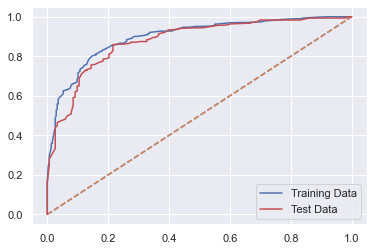

In [113]:

adb_pred_prob_train = adb.predict_proba(X_train)
# calculate AUC
adb_train_auc = metrics.roc_auc_score(y_train,adb_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % adb_train_auc)

# calculate roc curve
adbtrain_fpr, adbtrain_tpr, adbtrain_thresholds = roc_curve(y_train, adb_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adbtrain_fpr, adbtrain_tpr,label = 'Training Data',color="b")

adb_pred_prob_test = adb.predict_proba(X_test)
# calculate AUC
adb_test_auc = metrics.roc_auc_score(y_test,adb_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % adb_test_auc)

# calculate roc curve
adbtest_fpr, adbtest_tpr, adbtest_thresholds = roc_curve(y_test, adb_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adbtest_fpr, adbtest_tpr,label='Test Data',color="r")
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting 

In [114]:
print("Accuracy score  for Gradient Boosting train variables ",gdb.score(X_train, y_train))
print("Accuracy score  for Gradient Boosting test variables ",gdb.score(X_test, y_test))

Accuracy score  for Gradient Boosting train variables  0.8803016022620169
Accuracy score  for Gradient Boosting test variables  0.8289473684210527


 confusion matrix Train variables for Gradient Boosting 


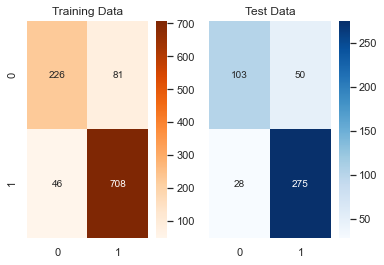

In [115]:
print(" confusion matrix Train variables for Gradient Boosting ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_gdb)),annot=True,fmt='.5g',cmap='Oranges',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_gdb)),annot=True,fmt='.5g',cmap='Blues',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [116]:
confusion_matrix(y_train,train_pred_gdb)

array([[226,  81],
       [ 46, 708]], dtype=int64)

In [117]:
confusion_matrix(y_test,test_pred_gdb)

array([[103,  50],
       [ 28, 275]], dtype=int64)

In [118]:
print("\nGradient Boosting Classfication report\n ")

print('Classification Report of the training data:\n',metrics.classification_report(y_train,train_pred_gdb),'\n')
print('Classification Report of the test data:\n',metrics.classification_report(y_test, test_pred_gdb),'\n')


Gradient Boosting Classfication report
 
Classification Report of the training data:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061
 

Classification Report of the test data:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.935
AUC for the Test Data: 0.897


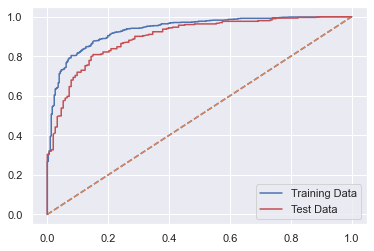

In [119]:

gdb_pred_prob_train = gdb.predict_proba(X_train)
# calculate AUC
gdb_train_auc = metrics.roc_auc_score(y_train,gdb_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gdb_train_auc)

# calculate roc curve
gdbtrain_fpr, gdbtrain_tpr, gdbtrain_thresholds = roc_curve(y_train, gdb_pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gdbtrain_fpr, gdbtrain_tpr,label = 'Training Data',color="b")

gdb_pred_prob_test = gdb.predict_proba(X_test)
# calculate AUC
gdb_test_auc = metrics.roc_auc_score(y_test,gdb_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gdb_test_auc)

# calculate roc curve
gdbtest_fpr, gdbtest_tpr, gdbtest_thresholds = roc_curve(y_test, gdb_pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gdbtest_fpr, gdbtest_tpr,label='Test Data',color="r")
# show the plot
plt.legend(loc='best')
plt.show()

In [120]:
cmetrics=classification_report(y_train,lgrpred_train,output_dict=True)
df0=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df0.loc["1"][2],2)
lg_train_recall=round(df0.loc["1"][1],2)
lg_train_precision=round(df0.loc["1"][0],2)
df0

,precision,recall,f1-score,support
0,0.755725,0.644951,0.695958,307.000000
1,0.863579,0.915119,0.888603,754.000000
accuracy,0.836946,0.836946,0.836946,0.836946
macro avg,0.809652,0.780035,0.792280,1061.000000
weighted avg,0.832372,0.836946,0.832861,1061.000000


In [121]:
cmetrics=classification_report(y_test,lgrpred_test,output_dict=True)
df1=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df1.loc["1"][2],2)
lg_test_recall=round(df1.loc["1"][1],2)
lg_test_precision=round(df1.loc["1"][0],2)
df1

,precision,recall,f1-score,support
0,0.758621,0.718954,0.738255,153.000000
1,0.861736,0.884488,0.872964,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.810179,0.801721,0.805610,456.000000
weighted avg,0.827138,0.828947,0.827766,456.000000


In [122]:
cmetrics=classification_report(y_train,ldapred_train,output_dict=True)
df2=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df2.loc["1"][2],2)
lda_train_recall=round(df2.loc["1"][1],2)
lda_train_precision=round(df2.loc["1"][0],2)
df2

,precision,recall,f1-score,support
0,0.743494,0.651466,0.694444,307.000000
1,0.864899,0.908488,0.886158,754.000000
accuracy,0.834119,0.834119,0.834119,0.834119
macro avg,0.804197,0.779977,0.790301,1061.000000
weighted avg,0.829771,0.834119,0.830686,1061.000000


In [123]:
cmetrics=classification_report(y_test,ldapred_test,output_dict=True)
df3=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df3.loc["1"][2],2)
lda_test_recall=round(df3.loc["1"][1],2)
lda_test_precision=round(df3.loc["1"][0],2)
df3

,precision,recall,f1-score,support
0,0.765517,0.725490,0.744966,153.000000
1,0.864952,0.887789,0.876221,303.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.815235,0.806639,0.810594,456.000000
weighted avg,0.831589,0.833333,0.832182,456.000000


In [124]:
cmetrics=classification_report(y_train,knny_train_predict,output_dict=True)
df4=pd.DataFrame(cmetrics).transpose()
knn_train_f1=round(df4.loc["1"][2],2)
knn_train_recall=round(df4.loc["1"][1],2)
knn_train_precision=round(df4.loc["1"][0],2)
df4

,precision,recall,f1-score,support
0,0.773050,0.710098,0.740238,307.000000
1,0.885751,0.915119,0.900196,754.000000
accuracy,0.855796,0.855796,0.855796,0.855796
macro avg,0.829400,0.812609,0.820217,1061.000000
weighted avg,0.853141,0.855796,0.853912,1061.000000


In [125]:
cmetrics=classification_report(y_test,knny_test_predict,output_dict=True)
df5=pd.DataFrame(cmetrics).transpose()
knn_test_f1=round(df5.loc["1"][2],2)
knn_test_recall=round(df5.loc["1"][1],2)
knn_test_precision=round(df5.loc["1"][0],2)
df5

,precision,recall,f1-score,support
0,0.766423,0.686275,0.724138,153.000000
1,0.849530,0.894389,0.871383,303.000000
accuracy,0.824561,0.824561,0.824561,0.824561
macro avg,0.807977,0.790332,0.797760,456.000000
weighted avg,0.821645,0.824561,0.821978,456.000000


In [126]:
cmetrics=classification_report(y_train,nby_train_predict,output_dict=True)
df6=pd.DataFrame(cmetrics).transpose()
nb_train_f1=round(df6.loc["1"][2],2)
nb_train_recall=round(df6.loc["1"][1],2)
nb_train_precision=round(df6.loc["1"][0],2)
df6

,precision,recall,f1-score,support
0,0.727586,0.687296,0.706868,307.000000
1,0.875486,0.895225,0.885246,754.000000
accuracy,0.835061,0.835061,0.835061,0.835061
macro avg,0.801536,0.791261,0.796057,1061.000000
weighted avg,0.832692,0.835061,0.833632,1061.000000


In [127]:
cmetrics=classification_report(y_test,nby_test_predict,output_dict=True)
df7=pd.DataFrame(cmetrics).transpose()
nb_test_f1=round(df7.loc["1"][2],2)
nb_test_recall=round(df7.loc["1"][1],2)
nb_test_precision=round(df7.loc["1"][0],2)
df7

,precision,recall,f1-score,support
0,0.736842,0.732026,0.734426,153.000000
1,0.865132,0.867987,0.866557,303.000000
accuracy,0.822368,0.822368,0.822368,0.822368
macro avg,0.800987,0.800006,0.800492,456.000000
weighted avg,0.822087,0.822368,0.822224,456.000000


In [128]:
cmetrics=classification_report(y_train,train_pred_bag,output_dict=True)
df8=pd.DataFrame(cmetrics).transpose()
bgcl_train_f1=round(df8.loc["1"][2],2)
bgcl_train_recall=round(df8.loc["1"][1],2)
bgcl_train_precision=round(df8.loc["1"][0],2)
df8

,precision,recall,f1-score,support
0,0.978723,0.899023,0.937182,307.000000
1,0.960205,0.992042,0.975864,754.000000
accuracy,0.965127,0.965127,0.965127,0.965127
macro avg,0.969464,0.945533,0.956523,1061.000000
weighted avg,0.965564,0.965127,0.964672,1061.000000


In [129]:
cmetrics=classification_report(y_test,test_pred_bag,output_dict=True)
df9=pd.DataFrame(cmetrics).transpose()
bgcl_test_f1=round(df9.loc["1"][2],2)
bgcl_test_recall=round(df9.loc["1"][1],2)
bgcl_test_precision=round(df9.loc["1"][0],2)
df9

,precision,recall,f1-score,support
0,0.792308,0.673203,0.727915,153.00000
1,0.846626,0.910891,0.877583,303.00000
accuracy,0.831140,0.831140,0.831140,0.83114
macro avg,0.819467,0.792047,0.802749,456.00000
weighted avg,0.828401,0.831140,0.827366,456.00000


In [130]:
cmetrics=classification_report(y_train,train_pred_adb,output_dict=True)
df10=pd.DataFrame(cmetrics).transpose()
abcl_train_f1=round(df10.loc["1"][2],2)
abcl_train_recall=round(df10.loc["1"][1],2)
abcl_train_precision=round(df10.loc["1"][0],2)
df10

,precision,recall,f1-score,support
0,0.757353,0.671010,0.711572,307.000000
1,0.871990,0.912467,0.891769,754.000000
accuracy,0.842601,0.842601,0.842601,0.842601
macro avg,0.814671,0.791738,0.801670,1061.000000
weighted avg,0.838820,0.842601,0.839629,1061.000000


In [131]:
cmetrics=classification_report(y_test,test_pred_adb,output_dict=True)
df11=pd.DataFrame(cmetrics).transpose()
abcl_test_f1=round(df11.loc["1"][2],2)
abcl_test_recall=round(df11.loc["1"][1],2)
abcl_test_precision=round(df11.loc["1"][0],2)
df11

,precision,recall,f1-score,support
0,0.738255,0.718954,0.728477,153.000000
1,0.859935,0.871287,0.865574,303.000000
accuracy,0.820175,0.820175,0.820175,0.820175
macro avg,0.799095,0.795121,0.797025,456.000000
weighted avg,0.819108,0.820175,0.819574,456.000000


In [132]:
cmetrics=classification_report(y_train,train_pred_gdb,output_dict=True)
df12=pd.DataFrame(cmetrics).transpose()
gbcl_train_f1=round(df12.loc["1"][2],2)
gbcl_train_recall=round(df12.loc["1"][1],2)
gbcl_train_precision=round(df12.loc["1"][0],2)
df12

,precision,recall,f1-score,support
0,0.830882,0.736156,0.780656,307.000000
1,0.897338,0.938992,0.917693,754.000000
accuracy,0.880302,0.880302,0.880302,0.880302
macro avg,0.864110,0.837574,0.849175,1061.000000
weighted avg,0.878109,0.880302,0.878041,1061.000000


In [133]:
cmetrics=classification_report(y_test,test_pred_gdb,output_dict=True)
df13=pd.DataFrame(cmetrics).transpose()
gbcl_test_f1=round(df13.loc["1"][2],2)
gbcl_test_recall=round(df13.loc["1"][1],2)
gbcl_test_precision=round(df13.loc["1"][0],2)
df13

,precision,recall,f1-score,support
0,0.786260,0.673203,0.725352,153.000000
1,0.846154,0.907591,0.875796,303.000000
accuracy,0.828947,0.828947,0.828947,0.828947
macro avg,0.816207,0.790397,0.800574,456.000000
weighted avg,0.826058,0.828947,0.825318,456.000000


In [134]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[lgmodel_train_score,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[lgmodel_test_score,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Train':[knnmodel_score,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knntmodel_score,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'Naive Bayes Train':[nbmodel_score,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'Naive Bayes Test':[nbtmodel_score,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'Bagging Train':[bag.score(X_train, y_train),bag_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'Bagging Test':[bag.score(X_test, y_test),bag_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'Ada Boosting Train':[adb.score(X_train, y_train),adb_train_auc,abcl_train_recall,abcl_train_precision,abcl_train_f1],
        'Ada Boosting Test':[adb.score(X_test, y_test),adb_test_auc,abcl_test_recall,abcl_test_precision,abcl_test_f1],
        'Gradient Boosting Train':[gdb.score(X_train, y_train),gdb_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'Gradient Boosting Test':[gdb.score(X_test, y_test),gdb_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1], },index=index)
        
        
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test,KNN Train,KNN Test,Naive Bayes Train,Naive Bayes Test,Bagging Train,Bagging Test,Ada Boosting Train,Ada Boosting Test,Gradient Boosting Train,Gradient Boosting Test
Accuracy,0.84,0.83,0.83,0.83,0.86,0.82,0.84,0.82,0.97,0.83,0.84,0.82,0.88,0.83
AUC,0.89,0.88,0.89,0.89,0.93,0.87,0.89,0.88,1.00,0.90,0.90,0.88,0.94,0.90
Recall,0.92,0.88,0.91,0.89,0.92,0.89,0.90,0.87,0.99,0.91,0.91,0.87,0.94,0.91
Precision,0.86,0.86,0.86,0.86,0.89,0.85,0.88,0.87,0.96,0.85,0.87,0.86,0.90,0.85
F1 Score,0.89,0.87,0.89,0.88,0.90,0.87,0.89,0.87,0.98,0.88,0.89,0.87,0.92,0.88


# Problem 2:

In [135]:
!pip install wordcloud

In [136]:
import nltk
import pandas as pd
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
text=['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']

## 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

In [138]:
for i in text:
     num_chars = len(inaugural.raw(i)) 
     num_words = len(inaugural.words(i))
     num_sents = len(inaugural.sents(i))
     print(i,'Number of characters:',num_chars,', Number of words:',num_words,', Number of sentence',num_sents )

1941-Roosevelt.txt Number of characters: 7571 , Number of words: 1536 , Number of sentence 68
1961-Kennedy.txt Number of characters: 7618 , Number of words: 1546 , Number of sentence 52
1973-Nixon.txt Number of characters: 9991 , Number of words: 2028 , Number of sentence 69


## 2.2 Remove all the stopwords from all three speeches

In [139]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

stop_words= set(stopwords.words('english'))
word_tokens = word_tokenize(Roosevelt)

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print('without removing stopwords\n\n',word_tokens)

print('\n\nstop words which got removed\n\n',set(word_tokens)-set(filtered_sentence))

print('\n\nAfter Removing all the stopwords from the speech\n\n',filtered_sentence)

print('\n\nnumber of words in Roosevelt :\n',len(filtered_sentence))


without removing stopwords

 ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'w

In [140]:
word_tokens = word_tokenize(Kennedy)

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print('without removing stopwords\n\n',word_tokens)

print('\n\nstop words which got removed\n\n',set(word_tokens)-set(filtered_sentence))

print('\n\nAfter Removing all the stopwords from the speech\n\n',filtered_sentence)

print('\n\nnumber of words in Kennedy\n\n',len(filtered_sentence))

without removing stopwords

 ['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'th

In [141]:
word_tokens = word_tokenize(Nixon)

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print('without removing stopwords\n\n',word_tokens)

print('\n\nstop words which got removed\n\n',set(word_tokens)-set(filtered_sentence))

print('\n\nAfter Removing all the stopwords from the speech\n\n',filtered_sentence)

print('\n\nnumber of words in Nixon :\n\n',len(filtered_sentence))

without removing stopwords

 ['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [142]:
tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common(3)

[('Nation', 12), ('Know', 10), ('Spirit', 9)]

In [143]:
tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common(3)


[('Let', 16), ('Us', 12), ('World', 8)]

In [144]:
tokenizer = RegexpTokenizer(r'\w+')
Nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common(3)

[('Us', 26), ('Let', 22), ('America', 21)]

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

Word Cloud of the speech of Roosevelt !!


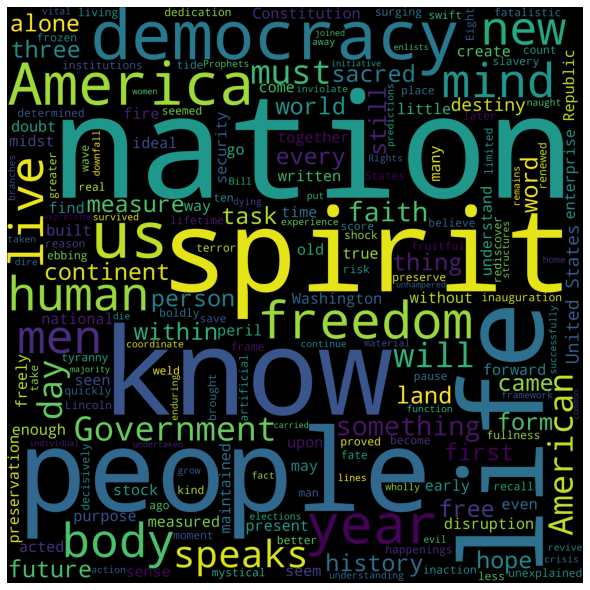

In [145]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of the speech of Roosevelt !!")
plt.show()



Word Cloud of the speech of Kennedy!


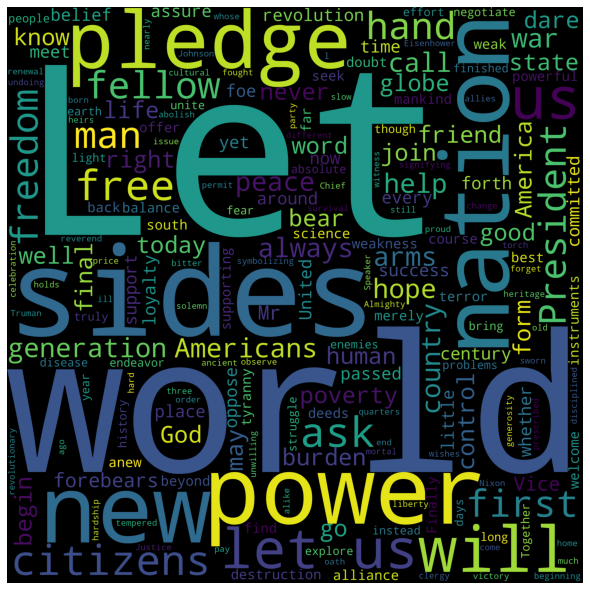

In [146]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of the speech of Kennedy!")
plt.show()



Word Cloud of the speech of Nixon !!


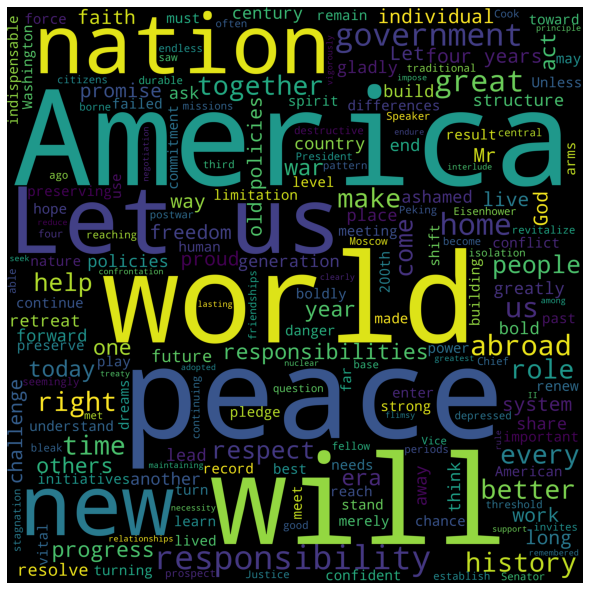

In [147]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(Nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of the speech of Nixon !!")
plt.show()
